In [1]:
import econpizza as ep
import matplotlib.pyplot as plt

In [2]:
model = ep.load('miu.yaml', raise_errors=True, verbose=True)

/Users/carlosortiz/econ_pizza_macro/venv/lib/python3.11/site-packages/econpizza/parser/__init__.py:262: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  init_wf = jnp.array(None)


(load:) Parsing done.


In [3]:
_ = model.solve_stst()

/Users/carlosortiz/econ_pizza_macro/venv/lib/python3.11/site-packages/econpizza/parser/__init__.py:262: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  init_wf = jnp.array(None)


    Iteration   1 | max. error 5.00e-02 | lapsed 0.1343
(solve_stst:) Steady state found (0.26359s). The solution converged.


In [4]:
model.steady_state

{'fixed_values': {'etac': 0.8,
  'etai': 0.3,
  'sigma': 1,
  'phi': 1.5,
  'rho': 0.8},
 'init_guesses': {'y': 0.1, 'c': 0.1, 'm': 0.1, 'pi': 0.1, 'i': 0.1},
 'newton_result': {'success': True,
  'message': 'The solution converged.',
  'x': Array([5.55111512e-17, 6.93889390e-17, 1.11022302e-16, 0.00000000e+00,
         9.71445147e-17], dtype=float64),
  'niter': 2,
  'fun': Array([4.16333634e-17, 5.41233725e-17, 6.93889390e-17, 6.93889390e-17,
         1.94289029e-17], dtype=float64),
  'jac': Array([[-1. ,  0. ,  0. ,  0. ,  1. ],
         [ 0. ,  0.3,  1. ,  0. , -0.8],
         [ 0. ,  1. ,  0. , -1. ,  0. ],
         [ 0. ,  1. ,  0. , -1.5,  0. ],
         [ 0. ,  0. ,  0. ,  0. ,  0.2]], dtype=float64),
  'det': None,
  'initial_values': {'guesses': {'c': 0.1,
    'i': 0.1,
    'm': 0.1,
    'pi': 0.1,
    'y': 0.1},
   'fixed': {'etac': 0.8, 'etai': 0.3, 'phi': 1.5, 'rho': 0.8, 'sigma': 1}}},
 'values_and_pars': ({'c': Array(5.55111512e-17, dtype=float64),
   'i': Array(6.93889

In [5]:
shk = ('ey', 0.01 ** 2)

x, flag = model.find_path(shock=shk)

/Users/carlosortiz/econ_pizza_macro/venv/lib/python3.11/site-packages/econpizza/solvers/stacking.py:83: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  dist0 = jnp.array(init_dist) if init_dist is not None else jnp.array(


    Iteration   1 | max error 1.00e-04 | lapsed 0.2609s
    Iteration   2 | max error 1.68e-20 | lapsed 0.2624s
(find_path:) Stacking done (0.365s). The solution converged.


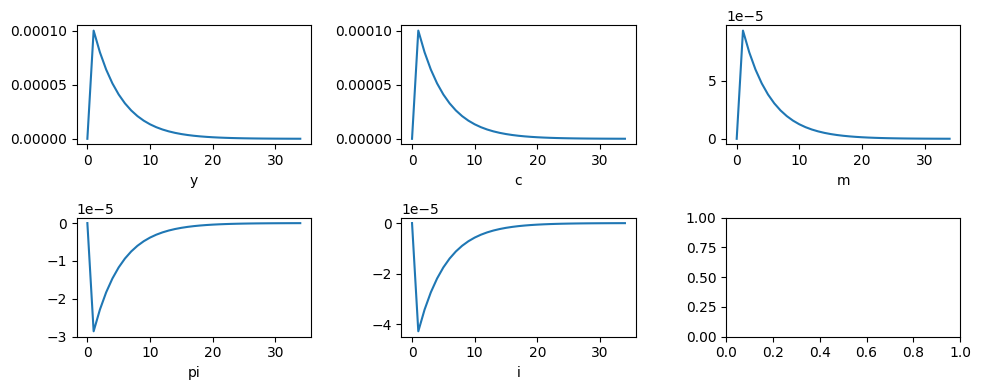

In [6]:

# plotting
fig, axs = plt.subplots(2, 3, figsize=(10, 4))
for i,v in enumerate(("y", "c", "m", "pi", "i")):

    axs.flatten()[i].plot(x[:35,model['variables'].index(v)])
    axs.flatten()[i].set_xlabel(v)

fig.tight_layout()